# Student Depression Dataset

Import Statements

In [5]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import  LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay, recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import FunctionTransformer

In [6]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment('student_depression_exp')

<Experiment: artifact_location='file:c:/Users/cathy/Documents/SDPAproject2025/Student-Depression/mlruns/1', creation_time=1768393657272, experiment_id='1', last_update_time=1768393657272, lifecycle_stage='active', name='student_depression_exp', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [7]:
import pickle

In [8]:
df = pd.read_csv('student_depression_dataset.csv')

In [9]:
df = df.drop('id',axis=1)

Exploratory Data Analysis

In [10]:
df.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [12]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [13]:
df.shape

(27901, 17)

In [14]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

Visualisations and Grouping

In [16]:
academic = df.groupby(['Academic Pressure'])['CGPA'].mean().reset_index()
academic

,Academic Pressure,CGPA
0,0.0,2.173333
1,1.0,7.724066
2,2.0,7.699495
3,3.0,7.646876
4,4.0,7.616541
5,5.0,7.626653


In [17]:
sleep = df.groupby(['Sleep Duration'])['CGPA'].mean().reset_index()

In [18]:
work = df.groupby(['Degree'])['Work/Study Hours'].mean().reset_index().sort_values
work


<bound method DataFrame.sort_values of         Degree  Work/Study Hours
0   'Class 12'          7.278289
1       B.Arch          7.266576
2        B.Com          7.227756
3         B.Ed          7.164971
4      B.Pharm          6.708642
5       B.Tech          7.070312
6           BA          7.195000
7          BBA          7.031609
8          BCA          7.226797
9           BE          7.161501
10         BHM          7.069189
11         BSc          7.248874
12         LLB          7.226528
13         LLM          6.927386
14       M.Com          6.828338
15        M.Ed          7.021924
16     M.Pharm          7.049828
17      M.Tech          7.393346
18          MA          7.380515
19         MBA          7.357651
20        MBBS          7.051724
21         MCA          7.022031
22          MD          6.973776
23          ME          6.989189
24         MHM          7.178010
25         MSc          7.168908
26      Others          5.857143
27         PhD          6.741379>

In [19]:
job = df.groupby(['Job Satisfaction'])['Work/Study Hours'].mean().reset_index().sort_values(by='Work/Study Hours')
job

,Job Satisfaction,Work/Study Hours
2,2.0,5.333333
4,4.0,5.500000
1,1.0,6.000000
0,0.0,7.157351
3,3.0,8.000000


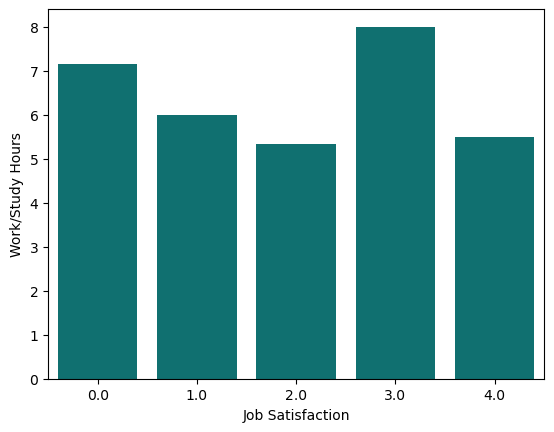

In [20]:
sns.barplot(x=job['Job Satisfaction'],y=job['Work/Study Hours'],color='teal')
plt.show()

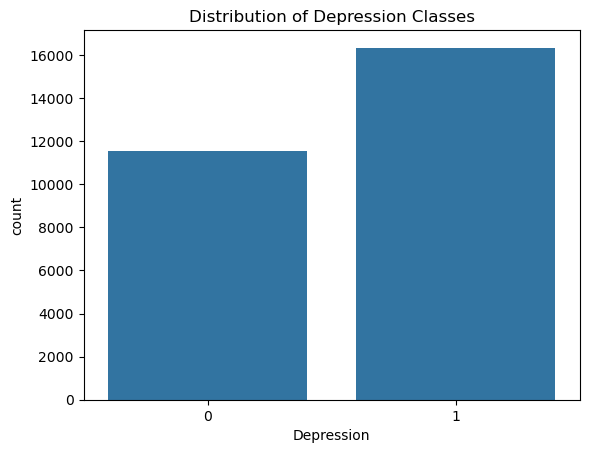

In [21]:
sns.countplot(x=df['Depression'])
plt.title('Distribution of Depression Classes')
plt.show()

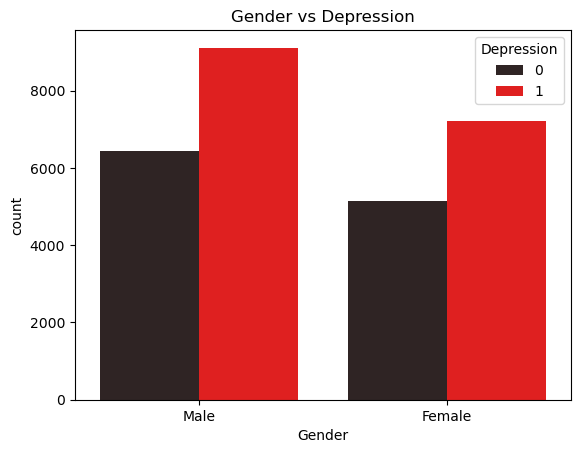

In [22]:
sns.countplot(x='Gender', hue='Depression', data=df, palette='dark:red')
plt.title('Gender vs Depression')
plt.show()

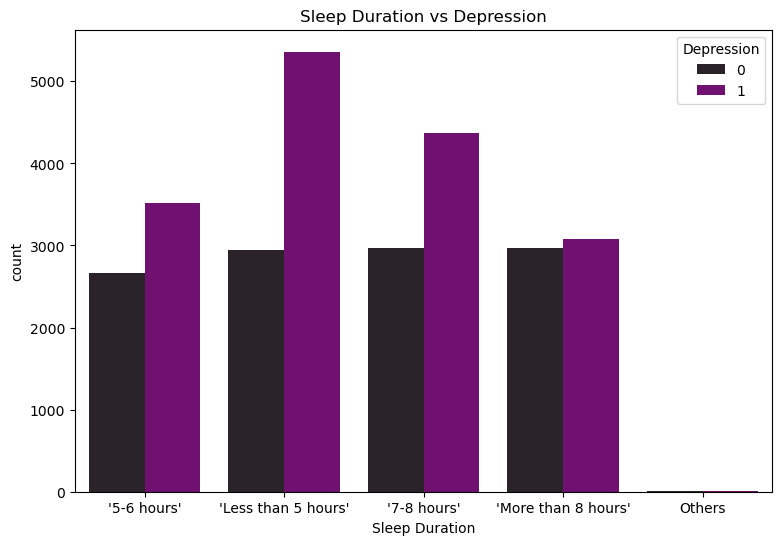

In [23]:
plt.figure(figsize=(9,6))
sns.countplot(x='Sleep Duration', hue='Depression', data=df, palette='dark:purple')
plt.title('Sleep Duration vs Depression')
plt.show()

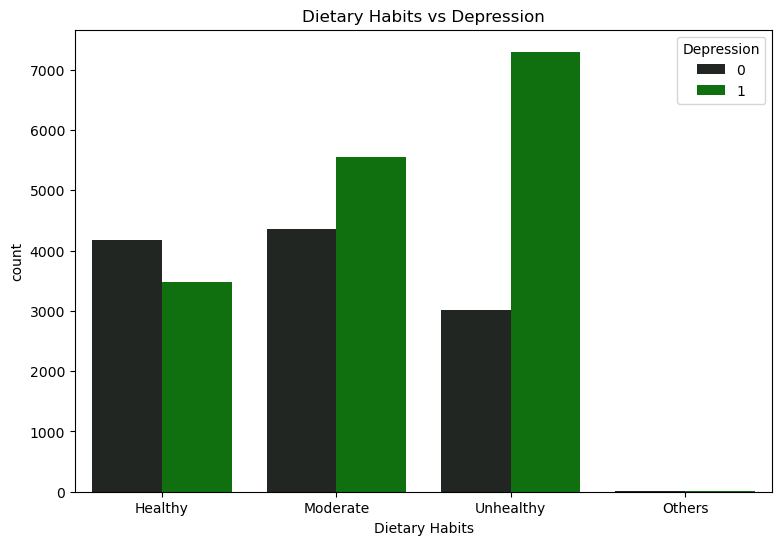

In [24]:
plt.figure(figsize=(9,6))
sns.countplot(x='Dietary Habits', hue='Depression', data=df, palette='dark:green')
plt.title('Dietary Habits vs Depression')
plt.show()

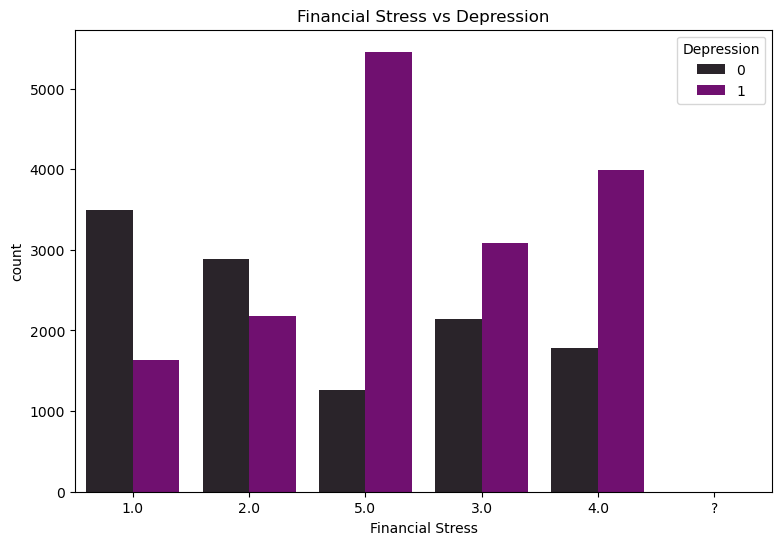

In [25]:
plt.figure(figsize=(9,6))
sns.countplot(x='Financial Stress', hue='Depression', data=df, palette='dark:purple')
plt.title('Financial Stress vs Depression')
plt.show()

C:\Users\cathy\AppData\Local\Temp\ipykernel_19112\4122120356.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df, color='blue')


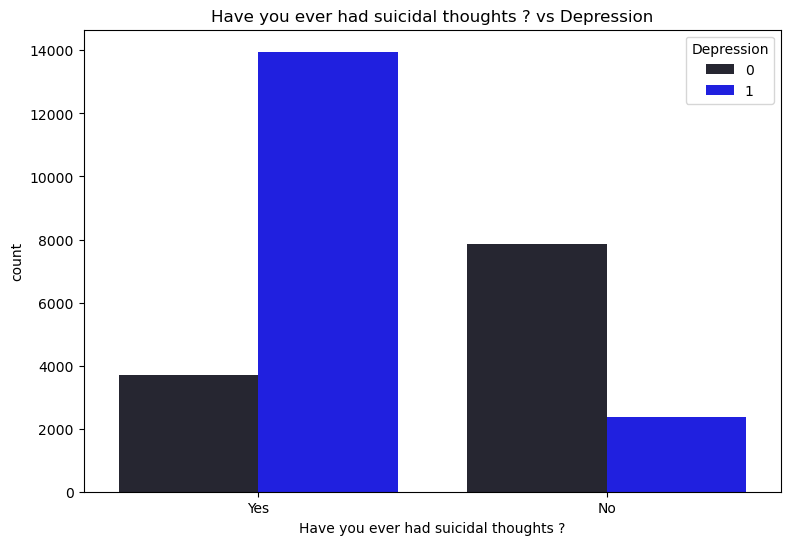

In [26]:
plt.figure(figsize=(9,6))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df, color='blue')
plt.title('Have you ever had suicidal thoughts ? vs Depression')
plt.show()

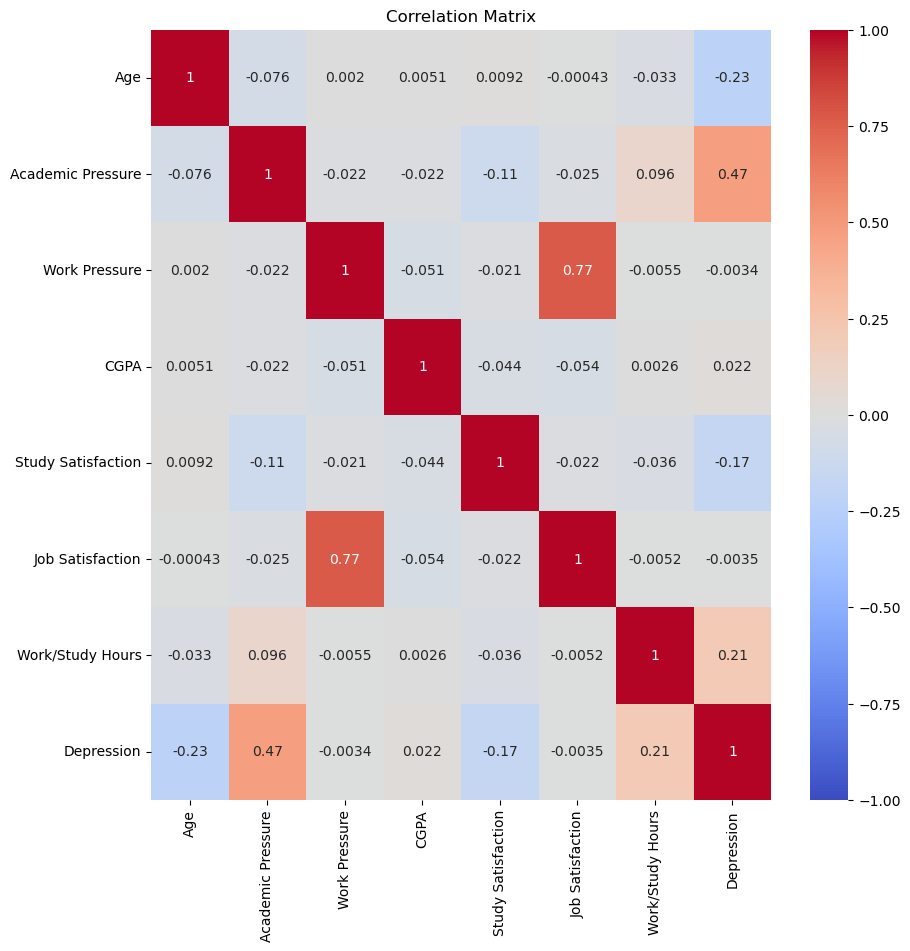

In [28]:
num_cols = df.select_dtypes(['int64','float64']).columns.tolist()
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, cmap='coolwarm',annot=True)
plt.title('Correlation Matrix')
plt.show()

From the plots, academic pressure stands out the most. Students with high academic pressure are much more likely to be depressed, while those with lower pressure are mostly not. Work pressure shows only a small effect since most students don’t experience much of it. CGPA doesn’t really separate depressed and non-depressed students at all, which suggests that grades themselves aren’t the issue. Age shows a slight pattern, with depression appearing a bit more common among younger students. Overall, the plot suggests that it’s the pressure around academics, not actual performance, that is most strongly linked to depression.

In [30]:
depression = df.groupby(['Academic Pressure'])['Depression'].mean().reset_index().sort_values(by='Academic Pressure')


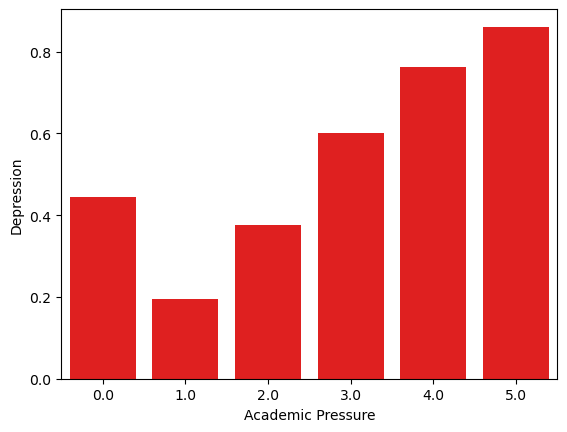

In [31]:
sns.barplot(x=depression['Academic Pressure'],y=depression['Depression'],color='red')
plt.show()

In [32]:
depression = df.groupby(['Age'])['Depression'].mean().reset_index().sort_values(by='Age')
depression


,Age,Depression
0,18.0,0.766226
1,19.0,0.705128
2,20.0,0.705856
3,21.0,0.677289
4,22.0,0.604310
5,23.0,0.638906
6,24.0,0.668291
7,25.0,0.606502
8,26.0,0.574026
9,27.0,0.606703


In [33]:
bins = [18,24,30,36,42,48,54,60]
labels = ['18-24','25-30','31-36','37-42','43-48','49-54','55-60']
df['Age Category'] = pd.cut(df['Age'],bins=bins, labels=labels,include_lowest=True)
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age Category
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1,31-36
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0,18-24
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0,31-36
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1,25-30
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0,25-30


In [34]:
age_category = df.groupby(['Age Category'])['Depression'].mean().reset_index().sort_values(by='Age Category')
age_category

C:\Users\cathy\AppData\Local\Temp\ipykernel_19112\2158683677.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category = df.groupby(['Age Category'])['Depression'].mean().reset_index().sort_values(by='Age Category')


,Age Category,Depression
0,18-24,0.683891
1,25-30,0.572957
2,31-36,0.409428
3,37-42,0.388889
4,43-48,0.375000
5,49-54,0.000000
6,55-60,0.000000


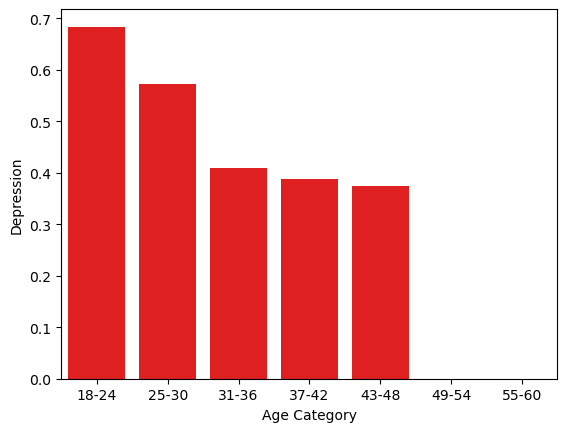

In [35]:
sns.barplot(x=age_category['Age Category'],y=age_category['Depression'],color='red')
plt.show()

In [36]:
job_satisfaction = df.groupby(['Job Satisfaction'])['Work Pressure'].mean().reset_index().sort_values(by='Job Satisfaction')
job_satisfaction

,Job Satisfaction,Work Pressure
0,0.0,0.0
1,1.0,1.0
2,2.0,0.0
3,3.0,0.0
4,4.0,5.0


In [37]:
df['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

Modelling

In [48]:
x = df.drop('Depression',axis=1)
y = df['Depression']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x,y,test_size=0.5, random_state=42)


In [49]:
cat_cols = x_train.select_dtypes(['object']).columns.tolist()
num_cols =  x_train.select_dtypes(['int64','float64']).columns.tolist()
num_transformer = StandardScaler(with_mean=False)
cat_transformer = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
preprocessor = ColumnTransformer([('Num',num_transformer,num_cols),('Col', cat_transformer, cat_cols)])

In [50]:
pipeline ={'LogisticRegression': Pipeline([('preprocessor',preprocessor),('Logisticregression',(LogisticRegression(solver='liblinear',max_iter=1000)))]),
'RandomForestClassifier': Pipeline([('preprocessor',preprocessor),('Randomforestclassifier',RandomForestClassifier(n_estimators=100,max_depth=12,min_samples_split=5))]),
'SVC': Pipeline([('preprocessor',preprocessor),('Svc',SVC(kernel='poly',C=1.0,gamma='scale',class_weight='balanced',probability=True))]),
'XGBoost': Pipeline([('preprocessor',preprocessor),('Xgboost',XGBClassifier(n_estimators=500,learning_rate=0.1,max_depth=6,subsample=0.8,colsample_bytree=0.8,eval_metric='logloss',random_state=42))]),
'LightGBM': Pipeline([('preprocessor',preprocessor),('Lightgbm',LGBMClassifier())]),
'CatBoost': Pipeline([('preprocessor',preprocessor),('Catboost',CatBoostClassifier(iterations=500,learning_rate=0.1,depth=6,loss_function='Logloss',eval_metric='F1',verbose=False,random_seed=42))]),
'HistGradientBoostingClassifier': Pipeline([('preprocessor',preprocessor),('Histgradientboosting',HistGradientBoostingClassifier(learning_rate=1,max_iter=100))])}


In [ ]:
for name,pipe in pipeline.items():
    try:
        with mlflow.start_run(run_name=name):
            mlflow.log_params(pipe.get_params())
            pipe.fit(x_train,y_train)
            y_pred = pipe.predict(x_val)
            accuracy = accuracy_score(y_val,y_pred)
            recall = recall_score(y_val,y_pred)
            precision = precision_score(y_val,y_pred)
            f1 = f1_score(y_val,y_pred)
            classification = classification_report(y_val,y_pred)
            print(f'{name} is trained, acc {accuracy:.4f}, recall {recall:.4f},precision {precision:.4f},f1_score {f1:.4f}')
            mlflow.log_metrics({'accuracy':accuracy,'recall':recall,'precision':precision,'f1_score':f1})
            print(f'classification report{classification}')
    except Exception as e:
        print(f'{name} failed:{e}')

LogisticRegression is trained, acc 0.8511, recall 0.8904,precision 0.8608,f1_score 0.8753
classification report              precision    recall  f1-score   support

           0       0.84      0.80      0.82      5760
           1       0.86      0.89      0.88      8190

    accuracy                           0.85     13950
   macro avg       0.85      0.84      0.85     13950
weighted avg       0.85      0.85      0.85     13950

RandomForestClassifier is trained, acc 0.8709, recall 0.9230,precision 0.8660,f1_score 0.8936
classification report              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5760
           1       0.87      0.92      0.89      8190

    accuracy                           0.87     13950
   macro avg       0.87      0.86      0.86     13950
weighted avg       0.87      0.87      0.87     13950

SVC is trained, acc 0.8512, recall 0.8585,precision 0.8846,f1_score 0.8714
classification report              precision 

c:\Users\cathy\anaconda3\envs\'musicenv'\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM is trained, acc 0.8777, recall 0.9107,precision 0.8844,f1_score 0.8974
classification report              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5760
           1       0.88      0.91      0.90      8190

    accuracy                           0.88     13950
   macro avg       0.88      0.87      0.87     13950
weighted avg       0.88      0.88      0.88     13950

CatBoost is trained, acc 0.9013, recall 0.9320,precision 0.9030,f1_score 0.9173
classification report              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5760
           1       0.90      0.93      0.92      8190

    accuracy                           0.90     13950
   macro avg       0.90      0.89      0.90     13950
weighted avg       0.90      0.90      0.90     13950

HistGradientBoostingClassifier is trained, acc 0.8648, recall 0.8989,precision 0.8743,f1_score 0.8865
classification report              precisi

Among the models evaluated—Logistic Regression, Random Forest, SVC, LightGBM, and CatBoost; Logistic Regression achieved the best overall performance in accuracy, recall, and F1-score, particularly for detecting depressed individuals, making it the preferred baseline model. It indicates that the underlying relationships in the data are largely linear

Accuracy alone was insufficient due to potential class imbalance, so we used precision, recall, F1-score, and confusion matrix for deeper evaluation. GridSearchCV was then applied to optimize hyperparameters and improve generalization.

In [55]:
xg = Pipeline([('preprocessor',preprocessor),('XGB', XGBClassifier(n_estimators=500,learning_rate=0.1,max_depth=6,subsample=0.8,colsample_bytree=0.8,eval_metric='logloss',random_state=42))])
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.4f}")



Accuracy: 0.8984


In [60]:
pipeline.keys()

dict_keys(['LogisticRegression', 'RandomForestClassifier', 'SVC', 'XGBoost', 'LightGBM', 'CatBoost', 'HistGradientBoostingClassifier'])

Results and Hyperparameter Tuning

In [46]:
param_grids = {'LogisticRegression': {'Logisticregression__C':[0.01,0.1,1,10],'Logisticregression__penalty':['l1','l2'],'Logisticregression__solver':['liblinear']},
    'RandomForestClassifier': {'Randomforestclassifier__n_estimators':[100,200],'Randomforestclassifier__max_depth':[10,12,15],'Randomforestclassifier__min_samples_split':[2,5]},
    'XGBoost': {'Xgboost__n_estimators':[100,300,500],'Xgboost__max_depth':[4,6,8],'Xgboost__learning_rate':[0.01,0.1]},
    'LightGBM': {'Lightgbm__n_estimators':[100,300,500],'Lightgbm__max_depth':[4,6,8],'Lightgbm__learning_rate':[0.01,0.1]},
    'CatBoost': {'Catboost__iterations':[100,300,500],'Catboost__learning_rate':[0.01,0.1],'Catboost__depth':[4,6,8]},
    'HistGradientBoostingClassifier': {'Histgradientboosting__max_iter':[100,200,300],'Histgradientboosting__max_depth':[3,5,7]}}

for name, pipe in pipeline.items():
    if name in param_grids:
        grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(x_train, y_train)
        print(f"{name} Best params: {grid.best_params_}, Best CV score: {grid.best_score_:.4f}")


LogisticRegression Best params: {'Logisticregression__C': 1, 'Logisticregression__penalty': 'l2', 'Logisticregression__solver': 'liblinear'}, Best CV score: 0.8509
RandomForestClassifier Best params: {'Randomforestclassifier__max_depth': 15, 'Randomforestclassifier__min_samples_split': 2, 'Randomforestclassifier__n_estimators': 200}, Best CV score: 0.8418
XGBoost Best params: {'Xgboost__learning_rate': 0.1, 'Xgboost__max_depth': 6, 'Xgboost__n_estimators': 100}, Best CV score: 0.8498
[LightGBM] [Info] Number of positive: 13098, number of negative: 9222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 22320, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.586828 -> initscore=0.350868
[LightGBM]

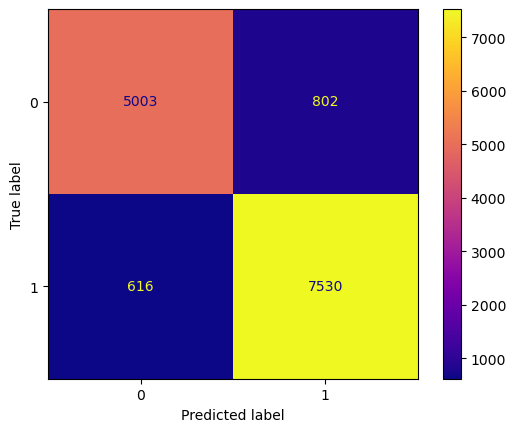

In [62]:
pipeline['XGBoost'].fit(x_train, y_train)
y_pred = pipeline['XGBoost'].predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='plasma')
plt.show()


1848 (TN) = correctly identified not depressed

495 (FP) = predicted depressed, but actually not

402 (FN) =  missed depressed individuals

2836 (TP) = correctly identified depressed individuals

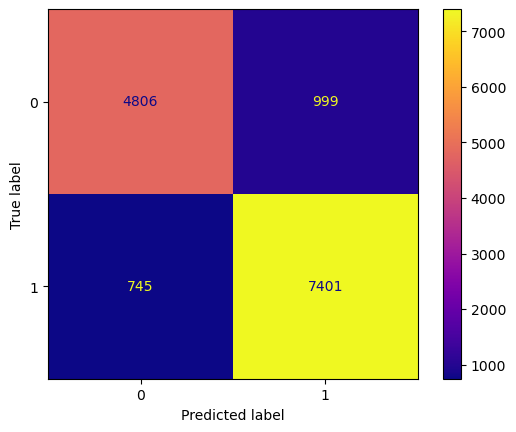

In [65]:
pipeline['CatBoost'].fit(x_train, y_train)
y_pred = pipeline['CatBoost'].predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='plasma')
plt.show()

1830 (TN) = correctly identified not depressed

513 (FP) = predicted depressed, but actually not

416 (FN) =  missed depressed individuals

2822 (TP) = correctly identified depressed individuals


The confusion matrix shows that the model correctly identifies the majority of depressed individuals, with relatively few false negatives, which is crucial for mental health screening tasks.

Here, logistic regression performs slightly better than catboost because it correctly identifies more depressed individuals (higher true positives) and makes fewer false positive predictions. This means it is more reliable for detecting depression while avoiding unnecessary misclassification of non-depressed individuals.

Also catboost has slightly more false positives than logistic regression, meaning it sometimes predicts depression for individuals who are not depressed. This happens because the model tries to catch as many true depressed cases as possible, increasing recall. Logistic regression, on the other hand, is slightly better balanced, correctly identifying most depressed individuals while making fewer incorrect predictions for non-depressed cases.

ROC AUC Score: 0.9131568756315382


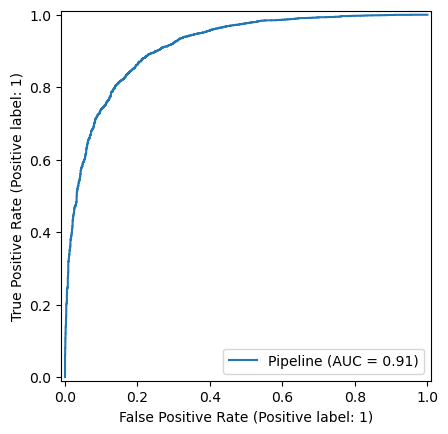

In [ ]:
y_prob = logistic_pipe.predict_proba(x_test)[:, 1]  
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc)
RocCurveDisplay.from_estimator(logistic_pipe, x_test, y_test)
plt.show()


ROC AUC Score: 0.912139164746843


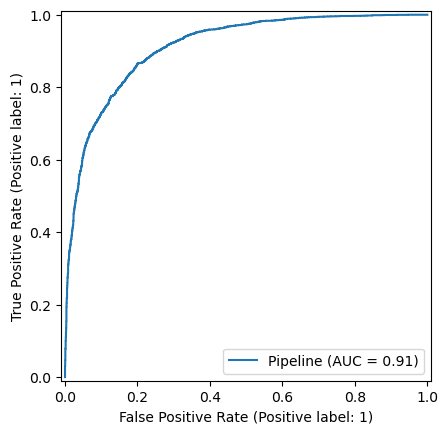

In [ ]:
y_prob = catboost_pipe.predict_proba(x_test)[:, 1]  
auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc)
RocCurveDisplay.from_estimator(catboost_pipe, x_test, y_test)
plt.show()

Logistic Regression slightly outperforms CatBoost, with more true positives, fewer false positives, and a marginally higher ROC–AUC (0.913 vs 0.912). Both models, however, perform very well at identifying depressed individuals.

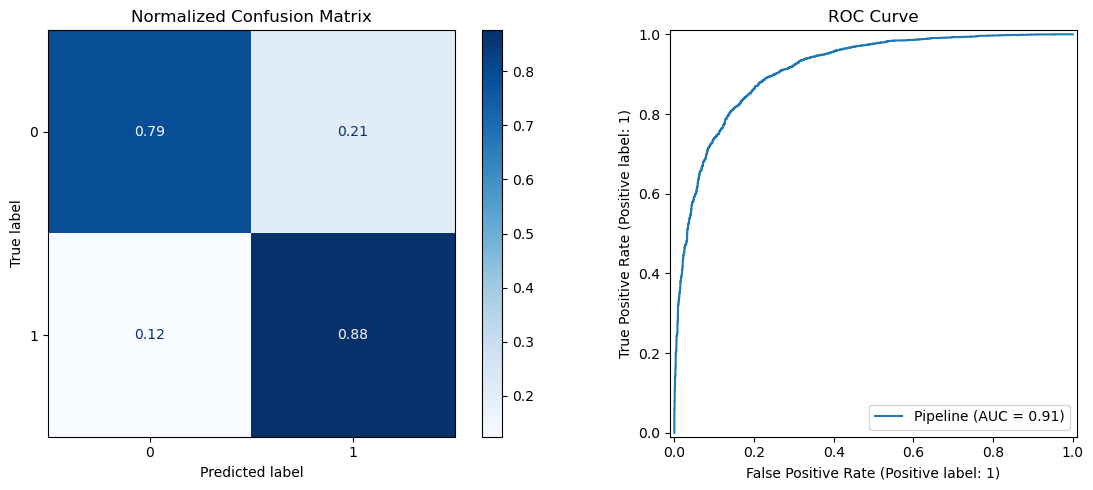

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(logistic_pipe, x_test, y_test,
normalize='true', ax=ax[0], cmap="Blues")
ax[0].set_title("Normalized Confusion Matrix")
RocCurveDisplay.from_estimator(logistic_pipe, x_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve")
plt.tight_layout()
plt.show()


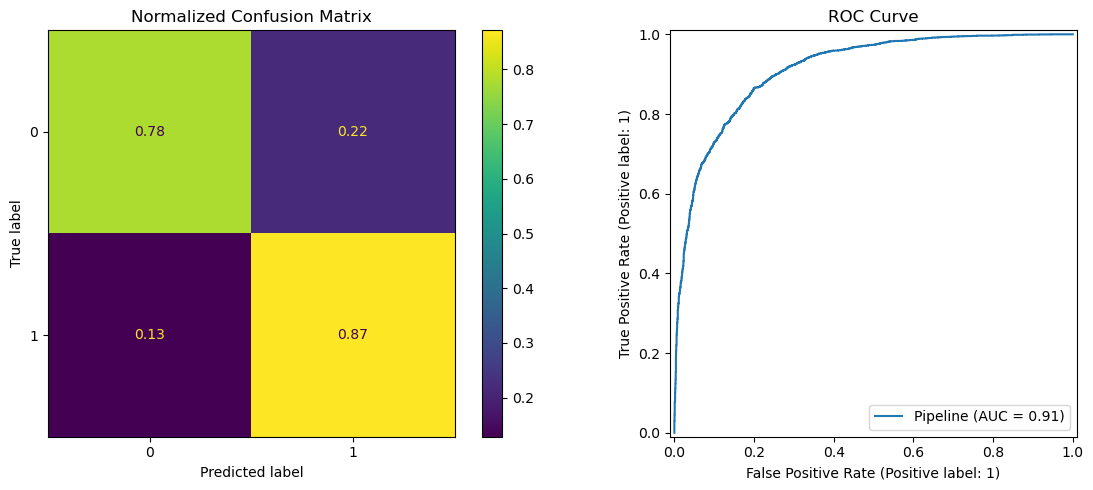

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(catboost_pipe, x_test, y_test,
normalize='true', ax=ax[0], cmap="viridis")
ax[0].set_title("Normalized Confusion Matrix")
RocCurveDisplay.from_estimator(catboost_pipe, x_test, y_test, ax=ax[1])
ax[1].set_title("ROC Curve")
plt.tight_layout()
plt.show()

As we have seen earlier, Logistic Regression slightly outperforms CatBoost in correctly identifying non-depressed individuals.Both models have almost identical ROC–AUC scores, indicating they are equally good at ranking individuals by depression risk.